*Este projeto está em desenvolvimento e tem como objetivo principal realizar web scraping no site da IMDb para analisar os 250 melhores filmes classificados....***


Vamos responder essas perguntas abaixo:

Quais são os gêneros mais comuns entre os 250 melhores filmes?

Quem são os diretores mais frequentes entre os 250 melhores filmes?

Quais são os atores mais comuns entre os filmes do top 250?

Quais são os anos com maior número de filmes no top 250?

Qual é a média de duração dos filmes do top 250?

Determine se existe uma tendência em relação ao tempo médio dos filmes.

## WEB SCRAPING ##

In [2]:
# Bibliotecas 
import requests as r
from bs4 import BeautifulSoup
import pandas as pd
import json

# O uso do cabeçalho "User-Agent" serve para simular um navegador real,
# evitando que o site bloqueie a requisição por parecer ser feita por um bot.


headers = {

  'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/125.0.0.0 Safari/537.36'

}
response = r.get("https://www.imdb.com/pt/chart/top/?ref_=nv_mv_250", headers=headers)


# Faz o parsing do conteúdo HTML da página
soup= BeautifulSoup(response.content, 'html.parser')

# Extraindo o script JSON-LD e convertendo em dicionário Python
df = soup.find('script', type='application/ld+json')

# Transformando dados em formato de string json em dicionario python
data =json.loads(df.string)

In [3]:
# Agora temos um dicionario em python após transformação
# Estou limintando quantidade item no dicionario para localizar o primerio com zero.
data["itemListElement"][0]

{'@type': 'ListItem',
 'item': {'@type': 'Movie',
  'url': 'https://www.imdb.com/pt/title/tt0111161/',
  'name': 'The Shawshank Redemption',
  'alternateName': 'Um Sonho de Liberdade',
  'description': 'Dois homens presos se reúnem ao longo de vários anos, encontrando consolo e eventual redenção através de atos de decência comum.',
  'image': 'https://m.media-amazon.com/images/M/MV5BYzU5NTFjNjItZGI1My00Y2Q0LTljOGUtMTFmZDNmMjZkZDIyXkEyXkFqcGc@._V1_.jpg',
  'aggregateRating': {'@type': 'AggregateRating',
   'bestRating': 10,
   'worstRating': 1,
   'ratingValue': 9.3,
   'ratingCount': 3062551},
  'contentRating': '16',
  'genre': 'Drama',
  'duration': 'PT2H22M'}}

In [4]:
# Podemos vê quantidade filme nesse dicionario

print(len(data['itemListElement']))

250


In [5]:
# Agora vamos analisar as caractericas desse dicinario escolhendo o primerio filme

data["itemListElement"][0]["item"]

{'@type': 'Movie',
 'url': 'https://www.imdb.com/pt/title/tt0111161/',
 'name': 'The Shawshank Redemption',
 'alternateName': 'Um Sonho de Liberdade',
 'description': 'Dois homens presos se reúnem ao longo de vários anos, encontrando consolo e eventual redenção através de atos de decência comum.',
 'image': 'https://m.media-amazon.com/images/M/MV5BYzU5NTFjNjItZGI1My00Y2Q0LTljOGUtMTFmZDNmMjZkZDIyXkEyXkFqcGc@._V1_.jpg',
 'aggregateRating': {'@type': 'AggregateRating',
  'bestRating': 10,
  'worstRating': 1,
  'ratingValue': 9.3,
  'ratingCount': 3062551},
 'contentRating': '16',
 'genre': 'Drama',
 'duration': 'PT2H22M'}

## ETL -TRANTAMENTO DOS DADOS ##

In [6]:
# Listas para armazenar os dados
tipo = []
name = []
alternateName = []
description = []
image = []
aggregateRating = [] 
contentRating = []
genre = []
duration = []

# Iterando sobre os filmes
for item in data['itemListElement']:
    filme = item['item']
    
    tipo.append(filme.get('@type', ''))
    name.append(filme.get('name', ''))
    alternateName.append(filme.get('alternateName', ''))
    description.append(filme.get('description', ''))
    image.append(filme.get('image', ''))
    aggregateRating.append(filme.get('aggregateRating', {}))  # Pode ser um dict
    contentRating.append(filme.get('contentRating', ''))
    genre.append(filme.get('genre', ''))
    duration.append(filme.get('duration', ''))

# Criando o DataFrame
filmes_250 = pd.DataFrame({
    'tipo': tipo,
    'name': name,
    'alternateName': alternateName,
    'description': description,
    'image': image,
    'aggregateRating': aggregateRating,
    'contentRating': contentRating,
    'genre': genre,
    'duration': duration
})


**ETL - PARTE 2 -TRANSFORMANDO O CAMPO "AggregateRating" QUE POSSUEM EM DICIONARIO EM COLUNAS**

In [7]:
# Garante que só processe se for um dicionário
filmes_250['aggregate_type'] = filmes_250['aggregateRating'].apply(lambda x: x.get('@type') if isinstance(x, dict) else None)
filmes_250['bestRating'] = filmes_250['aggregateRating'].apply(lambda x: x.get('bestRating') if isinstance(x, dict) else None)
filmes_250['worstRating'] = filmes_250['aggregateRating'].apply(lambda x: x.get('worstRating') if isinstance(x, dict) else None)
filmes_250['ratingValue'] = filmes_250['aggregateRating'].apply(lambda x: x.get('ratingValue') if isinstance(x, dict) else None)
filmes_250['ratingCount'] = filmes_250['aggregateRating'].apply(lambda x: x.get('ratingCount') if isinstance(x, dict) else None)


In [8]:
filmes_250.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tipo             250 non-null    object 
 1   name             250 non-null    object 
 2   alternateName    250 non-null    object 
 3   description      250 non-null    object 
 4   image            250 non-null    object 
 5   aggregateRating  250 non-null    object 
 6   contentRating    250 non-null    object 
 7   genre            250 non-null    object 
 8   duration         250 non-null    object 
 9   aggregate_type   250 non-null    object 
 10  bestRating       250 non-null    int64  
 11  worstRating      250 non-null    int64  
 12  ratingValue      250 non-null    float64
 13  ratingCount      250 non-null    int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 27.5+ KB


In [9]:
filmes_250.shape

(250, 14)

In [10]:
filmes_250.head(2)

,tipo,name,alternateName,description,image,aggregateRating,contentRating,genre,duration,aggregate_type,bestRating,worstRating,ratingValue,ratingCount
0,Movie,The Shawshank Redemption,Um Sonho de Liberdade,Dois homens presos se reúnem ao longo de vário...,https://m.media-amazon.com/images/M/MV5BYzU5NT...,"{'@type': 'AggregateRating', 'bestRating': 10,...",16,Drama,PT2H22M,AggregateRating,10,1,9.3,3062551
1,Movie,The Godfather,O Poderoso Chefão,O patriarca idoso de uma dinastia do crime org...,https://m.media-amazon.com/images/M/MV5BYTRmMj...,"{'@type': 'AggregateRating', 'bestRating': 10,...",14,"Policial, Drama",PT2H55M,AggregateRating,10,1,9.2,2137601


**Existe algum gênero que é mais popular ou mais assistido do que os demais?**

In [11]:
qtd_por_genero = filmes_250['genre'].value_counts().reset_index()
qtd_por_genero.columns =['Genero','proporção']
qtd_por_genero

,Genero,proporção
0,Drama,17
1,"Policial, Drama",13
2,"Biografia, Drama, História",9
3,"Policial, Drama, Mistério",9
4,"Drama, Guerra",8
...,...,...
102,Comédia,1
103,"Mistério, Romance, Suspense",1
104,"Comédia, Romance",1
105,"Ação, Suspense",1


**Precisamos tratar a coluna 'gênero', pois ela contém uma lista de gêneros. Vamos transformá-la em uma string.**

In [12]:
filmes_250['primeiro_genero'] = filmes_250['genre'].str.split(',', n=1).str[0]


**Agora temos um DataFrame com os filmes e suas informações, incluindo o primeiro gênero de cada filme.** 

In [13]:
filmes_250.head(1)

,tipo,name,alternateName,description,image,aggregateRating,contentRating,genre,duration,aggregate_type,bestRating,worstRating,ratingValue,ratingCount,primeiro_genero
0,Movie,The Shawshank Redemption,Um Sonho de Liberdade,Dois homens presos se reúnem ao longo de vário...,https://m.media-amazon.com/images/M/MV5BYzU5NT...,"{'@type': 'AggregateRating', 'bestRating': 10,...",16,Drama,PT2H22M,AggregateRating,10,1,9.3,3062551,Drama


**Agora vamos analisar a distribuição de filmes por gênero.**

In [14]:
qtd_filmes_por_genero = pd.concat(
    [filmes_250['primeiro_genero'].value_counts().reset_index(),
     filmes_250['primeiro_genero'].value_counts(normalize=True).reset_index(drop=True) * 100],
    axis=1
)

qtd_filmes_por_genero.columns = ['Genero', 'Quantidade', 'Proporção (%)']

In [63]:
qtd_filmes_por_gnr = pd.concat(
    [filmes_250['primeiro_genero'].value_counts().reset_index(),
    filmes_250['primeiro_genero'].value_counts(normalize=True).reset_index(drop=True)*100], axis=1)

qtd_filmes_por_gnr.columns = ['Genero', 'Quantidade', 'Proporção (%)']


qtd_filmes_por_gnr_ordenado = qtd_filmes_por_gnr.sort_values(by='Quantidade',ascending=True)

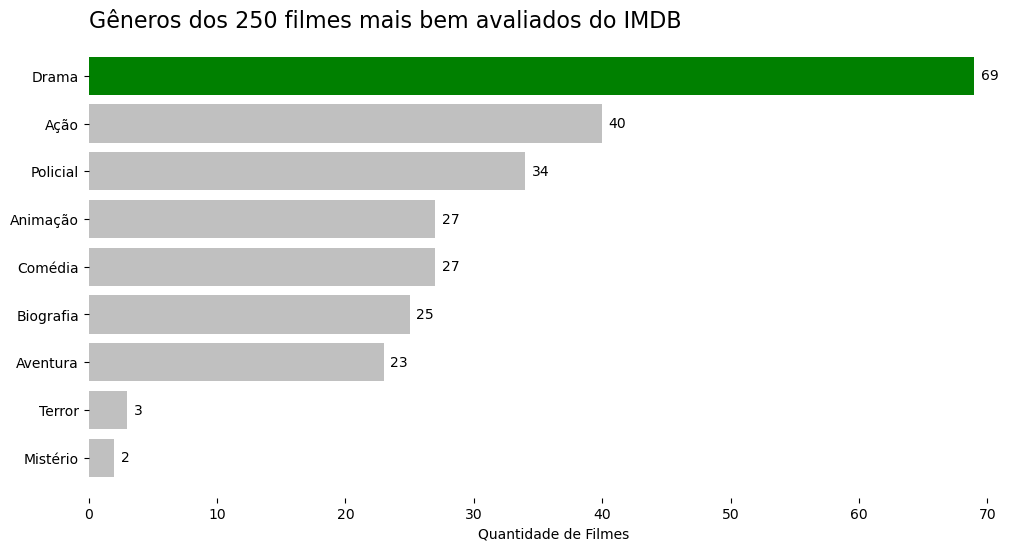

In [82]:
from matplotlib import pyplot as plt

cores = []

for genero in qtd_filmes_por_gnr_ordenado['Genero']:
    if genero =='Drama':
        cores.append('green')

    else:
        cores.append('silver')



fig, ax = plt.subplots(figsize=(12,6))

ax.barh(qtd_filmes_por_gnr_ordenado['Genero'], qtd_filmes_por_gnr_ordenado['Quantidade'], color=cores)
ax.set_title("Gêneros dos 250 filmes mais bem avaliados do IMDB",loc='left', fontsize=16)
ax.set_ylabel("")
ax.set_xlabel("Quantidade de Filmes", fontsize=10)

for i, v in enumerate(qtd_filmes_por_gnr_ordenado['Quantidade']):
    ax.text(v + 0.5, i, str(v), color='black', fontsize=10, va='center')

ax.set_frame_on(False)

plt.show()